In [1]:
%matplotlib inline
import numpy as np
import lal
import lalsimulation as lalsim
import h5py
from lal import MSUN_SI, PC_SI, PI
from pycbc import pnutils
import os
import matplotlib.pyplot as plt

### SEOBNRv4HM injection

In [3]:
# SEOBNRv4HM IMR run: https://galahad.aei.mpg.de/~rcotesta/LVC/offline_pe/S190521g/SEOBNRv4_HM/posplots.html

m1 = 146.030696429
m2 = 110.236336509
mtotal = m1 + m2
a1x, a1y, a1z = 0., 0., -0.0170583152996
a1x, a1y, a1z = 0., 0., -0.0168629958068
inclination = 0.662494704652
polarisation = 1.85211596063
ra = 3.30336019023
dec = 0.427787569121
distance = 4354.77930306
matched_filter_snr = 14.1190839091

In [3]:
command='pycbc_generate_hwinj --approximant SEOBNRv4HM --mass1 193.213626819 --mass2 96.6068134095 \
--spin1z -0.171452322533 --spin2z -0.0881284619252 \
--ra=3.28231874133 --dec=0.475837821099 --polarization 1.55948292938 --inclination 0.80501613159 \
--network-snr 14.3536640824 --instruments H1 L1 V1 \
--geocentric-end-time 1242442967.45 --gps-start-time 1242442821 --gps-end-time 1242442986 \
--asd-file H1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt \
L1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt \
V1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-AdV_O3low.txt \
--taper TAPER_STARTEND --waveform-low-frequency-cutoff 4.4 --low-frequency-cutoff 11.0 --sample-rate 4096 --tag SEOBNRv4HM'

os.system(command)

0

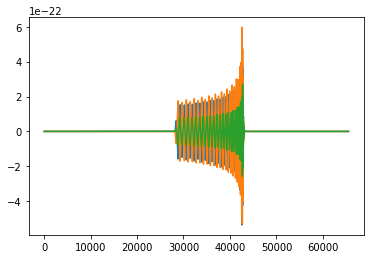

In [6]:
plt.plot(np.loadtxt('SEOBNRv4HM_1242442957_H1.txt'))
plt.plot(np.loadtxt('SEOBNRv4HM_1242442957_L1.txt'))
plt.plot(np.loadtxt('SEOBNRv4HM_1242442957_V1.txt'))

## NR Injection: SXS:BBH:0127

In [4]:
filepath = '/home/abhirup/ligo-nr-data/lvcnr-lfs/SXS/SXS_BBH_0127_Res5.h5'

f = h5py.File(filepath, 'r')

params = lal.CreateDict()
lalsim.SimInspiralWaveformParamsInsertNumRelData(params, filepath)

# Metadata parameters masses:
# Note there is an intrinsic check the make sure the mass ratio is correct

m1 = f.attrs['mass1']*mtotal
m2 = f.attrs['mass2']*mtotal

f_lower = f.attrs['f_lower_at_1MSUN']/mtotal  # this generates the whole NR waveforms

fRef = -1.#f_lower   #beginning of the waveform
fStart = f_lower#fRef

phiRef = 0.0

# Spins
# The NR spins need to be transformed into the lal frame. We wrote a function that does that for you:
spins = lalsim.SimInspiralNRWaveformGetSpinsFromHDF5File(fRef, mtotal,filepath)

s1x = spins[0]
s1y = spins[1]
s1z = spins[2]
s2x = spins[3]
s2y = spins[4]
s2z = spins[5]

print m1, m2, s1x, s2x, s1y, s2y, s1z, s2z

f.close()

command='pycbc_generate_hwinj --numrel-data /home/abhirup/ligo-nr-data/lvcnr-lfs/SXS/SXS_BBH_0006_Res5.h5 \
--approximant NR_hdf5 --order pseudoFourPN --mass1 %f --mass2 %f \
--spin1x %f --spin2x %f --spin1y %f --spin2y %f --spin1z %f --spin2z %f \
--ra=3.28231874133 --dec=0.475837821099 --polarization 1.55948292938 --inclination 0.80501613159 \
--network-snr 14.3536640824 --instruments H1 L1 V1 \
--geocentric-end-time 1242442967.45 --gps-start-time 1242442821 --gps-end-time 1242442986 \
--asd-file H1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt \
L1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt \
V1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-AdV_O3low.txt \
--taper TAPER_STARTEND --waveform-low-frequency-cutoff 4.4 --low-frequency-cutoff 11 --sample-rate 4096 --tag SXS'%(m1, m2, s1x, s2x, s1y, s2y, s1z, s2z)

print command
os.system(command)

146.7514564982691 109.51773850113356 0.0404270480451 0.0888845333707 0.0660845796841 0.0119045814591 -0.0173306049795 -0.17876862251
pycbc_generate_hwinj --numrel-data /home/abhirup/ligo-nr-data/lvcnr-lfs/SXS/SXS_BBH_0006_Res5.h5 --approximant NR_hdf5 --order pseudoFourPN --mass1 146.751456 --mass2 109.517739 --spin1x 0.040427 --spin2x 0.088885 --spin1y 0.066085 --spin2y 0.011905 --spin1z -0.017331 --spin2z -0.178769 --ra=3.28231874133 --dec=0.475837821099 --polarization 1.55948292938 --inclination 0.80501613159 --network-snr 14.3536640824 --instruments H1 L1 V1 --geocentric-end-time 1242442967.45 --gps-start-time 1242442821 --gps-end-time 1242442986 --asd-file H1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt L1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T1800545-v1-aLIGO_O3low.txt V1:/home/abhirup/opt/lalsuite_pSEOBNRv4HM_tgr_20190724_97bbac2d/share/lalsimulation/LIGO-T180054

256

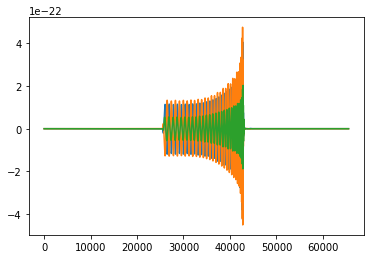

In [8]:
plt.plot(np.loadtxt('SXS_1242442957_H1.txt'))
plt.plot(np.loadtxt('SXS_1242442957_L1.txt'))
plt.plot(np.loadtxt('SXS_1242442957_V1.txt'))